<a href="https://colab.research.google.com/github/Mshiravi7/carprice-LR/blob/main/car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing libraries**

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler,MinMaxScaler


from sklearn.linear_model import LinearRegression


# **Reading data**

In [2]:
dataset = pd.read_csv(r'/content/drive/MyDrive/car data.csv')
dataset.shape

(301, 9)

In [3]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
#missing values
dataset.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
x = dataset.isnull().sum()
y = (dataset.isnull().sum()/dataset.shape[0])*100
z = {'number of missing values:':x ,'percentage of missing values:':y}
df = pd.DataFrame(z,columns=['number of missing values:','percentage of missing values:'])
df.sort_values(by='percentage of missing values:',ascending=False)

,number of missing values:,percentage of missing values:
Car_Name,0,0.0
Year,0,0.0
Selling_Price,0,0.0
Present_Price,0,0.0
Kms_Driven,0,0.0
Fuel_Type,0,0.0
Seller_Type,0,0.0
Transmission,0,0.0
Owner,0,0.0


# **EDA**

In [8]:
dataset.columns


Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [9]:
print(dataset['Fuel_Type'].unique())
print(dataset['Seller_Type'].unique())
print(dataset['Transmission'].unique())
print(dataset['Owner'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [10]:
dataset['Age'] = 2022 - dataset['Year']

In [11]:
#calculage avg dollar per mile
dataset["avgPerkms"] = dataset["Selling_Price"] / dataset["Kms_Driven"]

#**visualization data**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

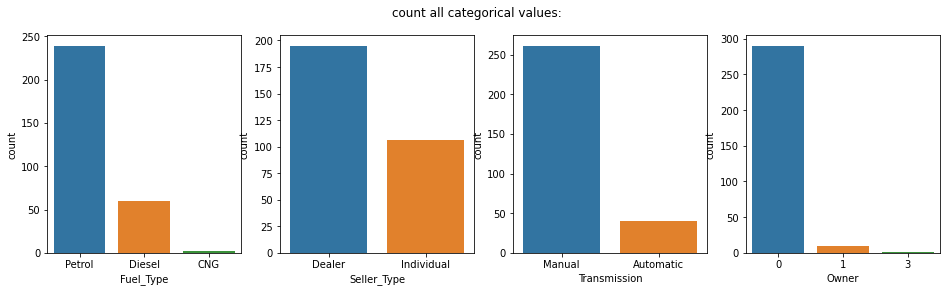

In [12]:
plt.rcParams['figure.figsize'] = (16,4)

plt.subplot(1,4,1)
sns.countplot(dataset['Fuel_Type'])

plt.subplot(1,4,2)
sns.countplot(dataset['Seller_Type'])

plt.subplot(1,4,3)
sns.countplot(dataset['Transmission'])

plt.subplot(1,4,4)
sns.countplot(dataset['Owner'])

plt.suptitle("count all categorical values: ")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


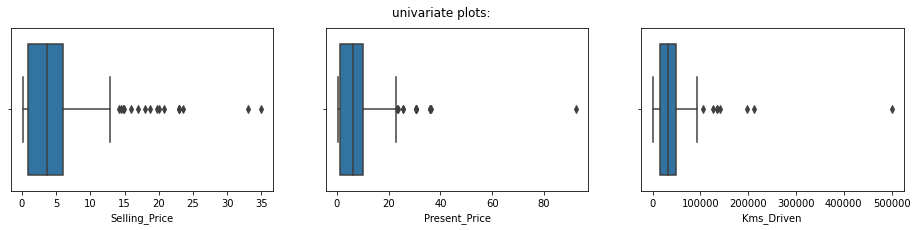

In [13]:
plt.rcParams['figure.figsize'] = (16,3)


plt.subplot(1,3,1)
sns.boxplot(dataset['Selling_Price'])

plt.subplot(1,3,2)
sns.boxplot(dataset['Present_Price'])

plt.subplot(1,3,3)
sns.boxplot(dataset['Kms_Driven'])

plt.suptitle('univariate plots: ')
plt.show()

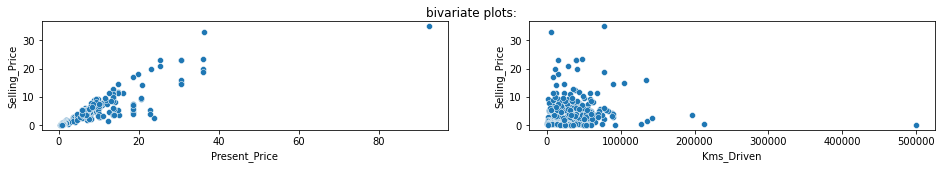

In [14]:
plt.rcParams['figure.figsize'] = (16,2)


plt.subplot(1,2,1)
sns.scatterplot(y=dataset['Selling_Price'],x=dataset['Present_Price'])

plt.subplot(1,2,2)
sns.scatterplot(y=dataset['Selling_Price'],x=dataset['Kms_Driven'])

plt.suptitle('bivariate plots: ')
plt.show()

In [15]:
#delete 2 outliers :
dataset = dataset[~(dataset['Selling_Price']>29)]

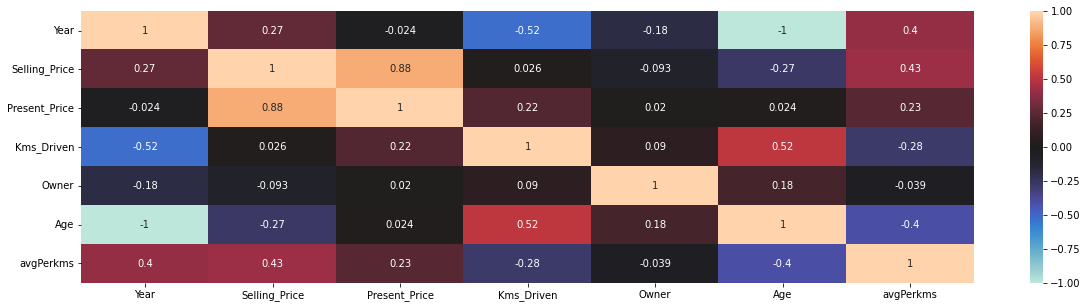

In [16]:
plt.figure(figsize=(20,5))
features_correlation = dataset.corr()
sns.heatmap(features_correlation, annot=True, vmin=-1, vmax=1, center=0)

In [17]:
# 2 useless values deleted:
dataset.drop('Year',axis=1,inplace = True)
dataset.drop('Kms_Driven',axis=1,inplace = True) 
dataset.drop('Car_Name',axis=1,inplace = True) 

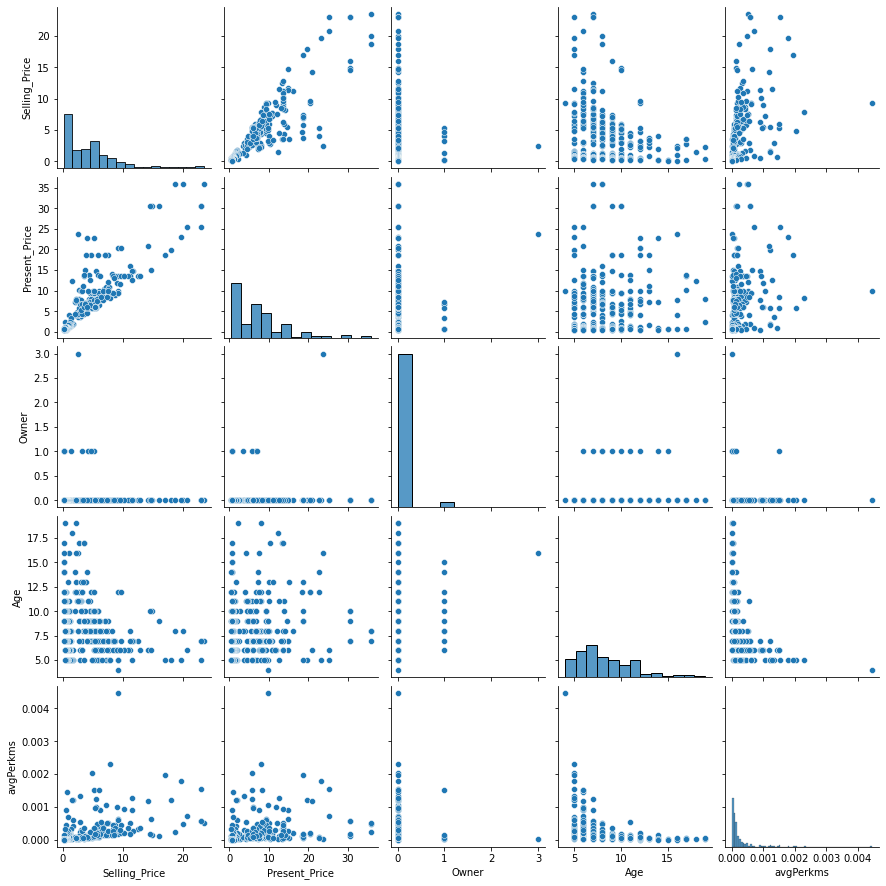

In [18]:
sns.pairplot(dataset)

In [19]:
dataset = pd.get_dummies(dataset) 

In [20]:
dataset

,Selling_Price,Present_Price,Owner,Age,avgPerkms,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,0,8,0.000124,0,0,1,1,0,0,1
1,4.75,9.54,0,9,0.000110,0,1,0,1,0,0,1
2,7.25,9.85,0,5,0.001051,0,0,1,1,0,0,1
3,2.85,4.15,0,11,0.000548,0,0,1,1,0,0,1
4,4.60,6.87,0,8,0.000108,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,0,6,0.000280,0,1,0,1,0,0,1
297,4.00,5.90,0,7,0.000067,0,0,1,1,0,0,1
298,3.35,11.00,0,13,0.000038,0,0,1,1,0,0,1
299,11.50,12.50,0,5,0.001278,0,1,0,1,0,0,1


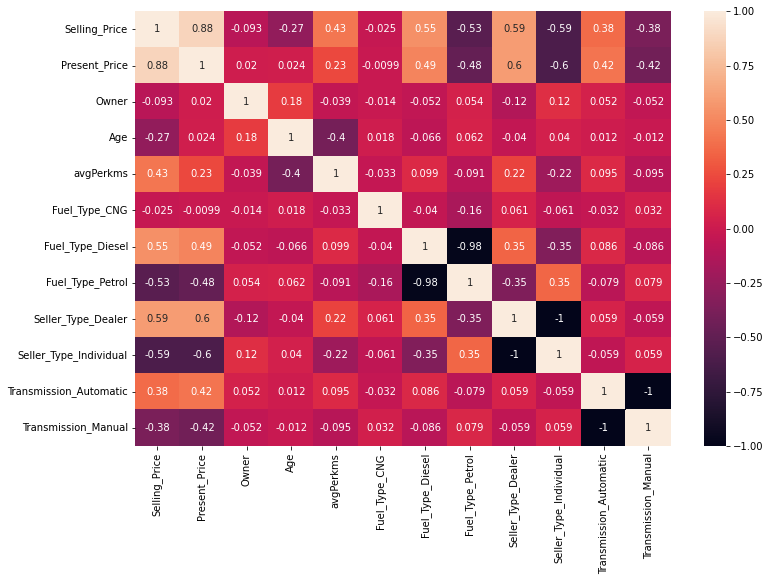

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(dataset.corr(),annot=True)

#**Split**

In [22]:
# Separating target variable and its features
y = dataset['Selling_Price']
X = dataset.drop('Selling_Price',axis=1)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [24]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

#**Modeling**

## **Linear Regression**

Train R2-score : 0.918
Test R2-score : 0.763
MAE: 1.2752299257646798
MSE: 4.758854029888156
RMSE: 2.181479779848568


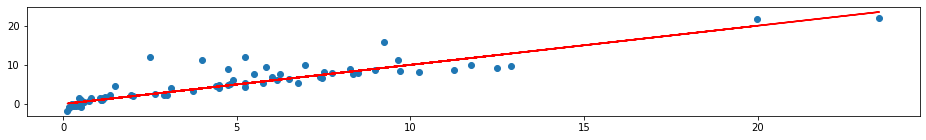

In [31]:
lr = LinearRegression()
lr.fit(X_train,y_train)

# R2 score of train set
y_pred_train = lr.predict(X_train)
R2_train_model = r2_score(y_train,y_pred_train)

# R2 score of test set
y_pred_test = lr.predict(X_test)
R2_test_model = r2_score(y_test,y_pred_test)


# Regression evaluation metrics
MAE_model = metrics.mean_absolute_error(y_test, y_pred_test)
MSE_model = metrics.mean_squared_error(y_test, y_pred_test)
RMSE_model = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))


print("Train R2-score :",round(R2_train_model,3))
print("Test R2-score :",round(R2_test_model,3))
print('MAE:', MAE_model)
print('MSE:', MSE_model)
print('RMSE:', RMSE_model)

predictions=lr.predict(X_test)
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')
plt.show()